In [1]:
!ls detect/train

args.yaml					  results.png
confusion_matrix_normalized.png			  train_batch0.jpg
confusion_matrix.png				  train_batch1.jpg
events.out.tfevents.1733042662.a6ac34dfe5b0.23.0  train_batch2.jpg
F1_curve.png					  val_batch0_labels.jpg
labels_correlogram.jpg				  val_batch0_pred.jpg
labels.jpg					  val_batch1_labels.jpg
P_curve.png					  val_batch1_pred.jpg
PR_curve.png					  val_batch2_labels.jpg
R_curve.png					  val_batch2_pred.jpg
results.csv					  weights


In [2]:
!ls detect/train2

confusion_matrix_normalized.png  PR_curve.png		val_batch1_labels.jpg
confusion_matrix.png		 R_curve.png		val_batch1_pred.jpg
F1_curve.png			 val_batch0_labels.jpg	val_batch2_labels.jpg
P_curve.png			 val_batch0_pred.jpg	val_batch2_pred.jpg


In [3]:
from ultralytics import YOLO

model = YOLO("detect/train/weights/best.pt")  # build a new model from YAML


In [4]:
from PIL import Image
import pandas as pd
import numpy as np

In [52]:
result =pd.read_csv('detect/train/results.csv')
result2 =pd.read_csv('detect2/train/results.csv')
result3 =pd.read_csv('detect3/train/results.csv')
result4 =pd.read_csv('detect4/train/results.csv')

all_results = pd.concat([result,result2,result3,result4])
all_results

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,10361.1,0.98901,0.91266,1.14804,0.53658,0.27242,0.30425,0.20435,0.98911,1.38032,1.22087,0.000088,0.000088,0.000088
0,1,10363.1,0.83936,0.58908,1.07377,0.68347,0.29809,0.35275,0.24055,0.92503,1.16476,1.16404,0.000088,0.000088,0.000088
0,1,10354.2,0.78313,0.52526,1.04507,0.65246,0.35226,0.40651,0.26037,0.90373,1.02936,1.15905,0.000088,0.000088,0.000088
0,1,10334.2,0.62713,0.43526,1.03507,0.72543,0.39581,0.46452,0.30239,0.87234,0.96936,1.12749,0.000088,0.000088,0.000088


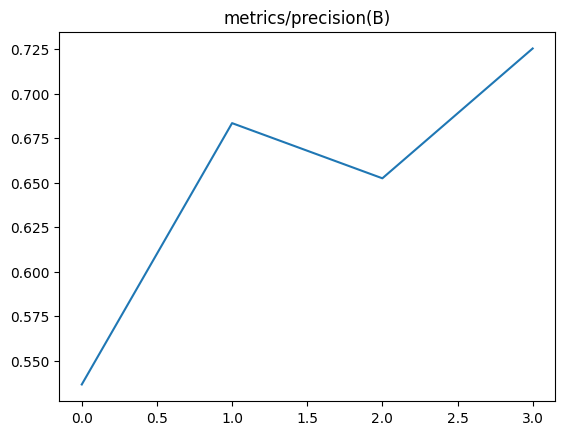

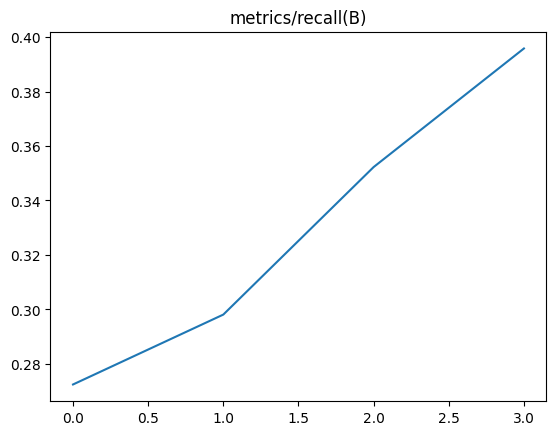

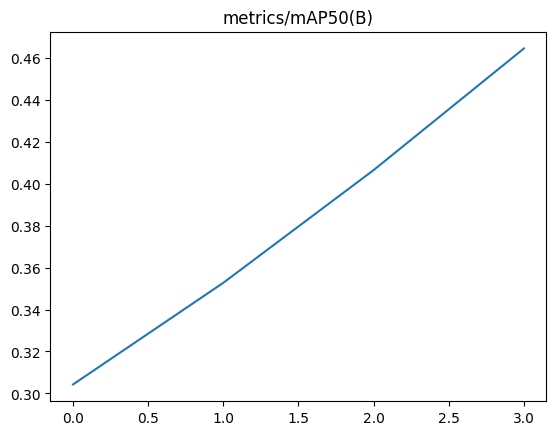

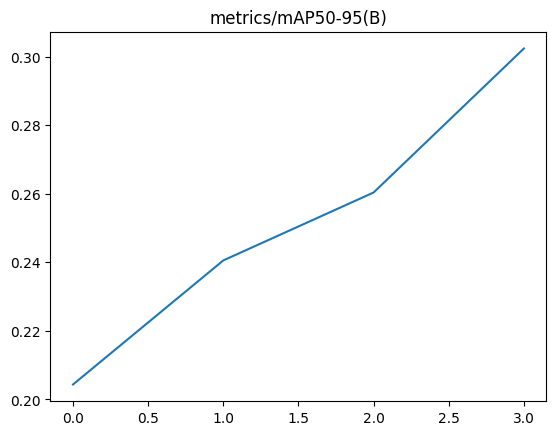

In [58]:
import matplotlib.pyplot as plt
for i in ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']:
    plt.title(i)
    plt.plot(range(4),all_results[i])
    plt.show()

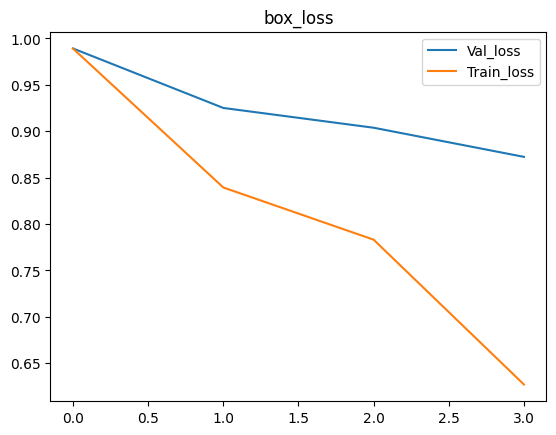

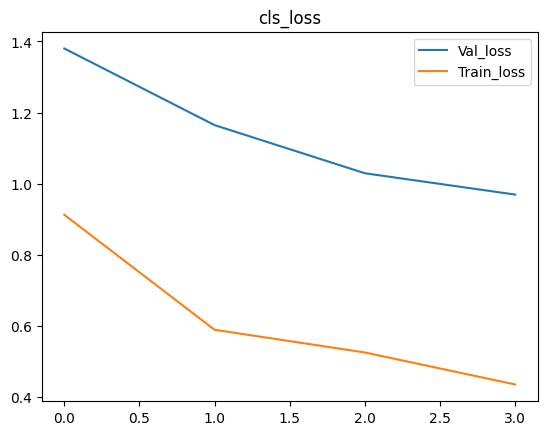

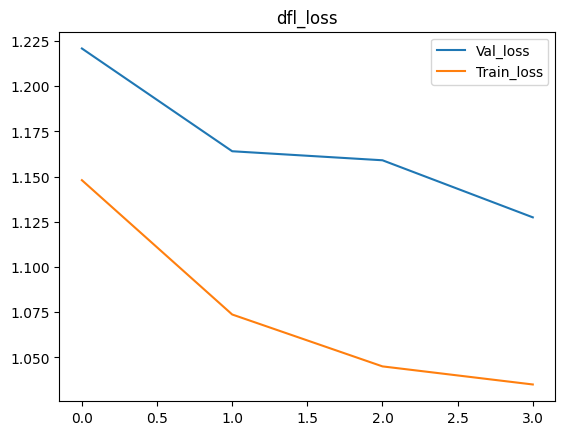

In [62]:
for i in ['box_loss', 'cls_loss', 'dfl_loss']:
    plt.title(i)
    plt.plot(range(4),all_results[f'val/{i}'])
    plt.plot(range(4),all_results[f'train/{i}'])
    plt.legend(['Val_loss', 'Train_loss'])
    plt.show()

In [63]:
df = pd.read_csv('data.csv')
df

,img_id,cam_id,seq_id,frame_id,bbox_id,x_min,x_max,y_min,y_max,label_l1,label_l2,fao_mfa,train,val,test
0,da7c5ef0-db28-11ea-b693-9b3523cc10a5,60,13209,33,1,626,754,-1,88,Human,HUMAN,81,True,False,False
1,da7c5ef0-db28-11ea-b693-9b3523cc10a5,60,13209,33,3,544,710,15,203,Human,HUMAN,81,True,False,False
2,da7c5ef0-db28-11ea-b693-9b3523cc10a5,60,13209,33,4,629,735,210,562,Human,HUMAN,81,True,False,False
3,da7c5ef0-db28-11ea-b693-9b3523cc10a5,60,13209,33,5,615,883,550,907,Human,HUMAN,81,True,False,False
4,da7c5ef0-db28-11ea-b693-9b3523cc10a5,60,13209,33,6,885,962,826,875,Unknown,OTH,81,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549204,fcdecc18-5952-11ec-a87d-47788f674eed,93,15,28,126812,227,510,702,992,Yellowfin tuna,YFT,81,False,False,True
549205,fcdeef2c-5952-11ec-a8ae-cf526681fdda,93,15,77,128339,223,518,700,996,Yellowfin tuna,YFT,81,False,False,True
549206,fcdeef2c-5952-11ec-a8ae-cf526681fdda,93,15,77,128338,875,1127,668,1030,Yellowfin tuna,YFT,81,False,False,True
549207,fcdeef2c-5952-11ec-a8ae-cf526681fdda,93,15,77,128337,1069,1465,487,674,Yellowfin tuna,YFT,81,False,False,True


In [75]:
img_test_name = df[df['val']==True].reset_index().loc[0,'img_id']
image_path = 'img'


In [82]:
from PIL import Image, ImageDraw

def plot_graun_true(name):
    bboxs= df[df['img_id'] == name][['x_min', 'y_min','x_max', 'y_max']].to_numpy()
    classes_name= df[df['img_id'] == name]['label_l1'].to_numpy()
    img_test = Image.open(f'{image_path}/{name}.jpg')
    img_test_draw = ImageDraw.Draw(img_test)
    for bbox,cl in zip(bboxs,classes_name):
        img_test_draw.rectangle(bbox, outline='red')
        img_test_draw.text(bbox[:2],cl,font_size=20,stroke_width=1)

    return img_test


In [78]:
r = model.predict(f'{image_path}/{img_test_name}.jpg')


image 1/1 /home/void/ml_oleg/img/94dd66c8-23f0-11e9-b4f7-7feec33e644c.jpg: 384x640 3 Humans, 1 Yellowfin tuna, 512.5ms
Speed: 16.8ms preprocess, 512.5ms inference, 7.3ms postprocess per image at shape (1, 3, 384, 640)


In [79]:
r[0].boxes.cls,r[0].boxes.xyxy,r[0].boxes.conf

(tensor([15., 17., 15., 15.]),
 tensor([[169.5077,  82.5599, 344.3788, 435.4547],
         [ 74.9683, 538.9850, 377.1277, 669.2844],
         [ 29.0681,   2.5833, 122.1747, 139.7946],
         [  0.0000, 297.3224, 184.8798, 649.4117]]),
 tensor([0.9135, 0.7999, 0.6518, 0.5445]))

In [80]:
classes = model.names

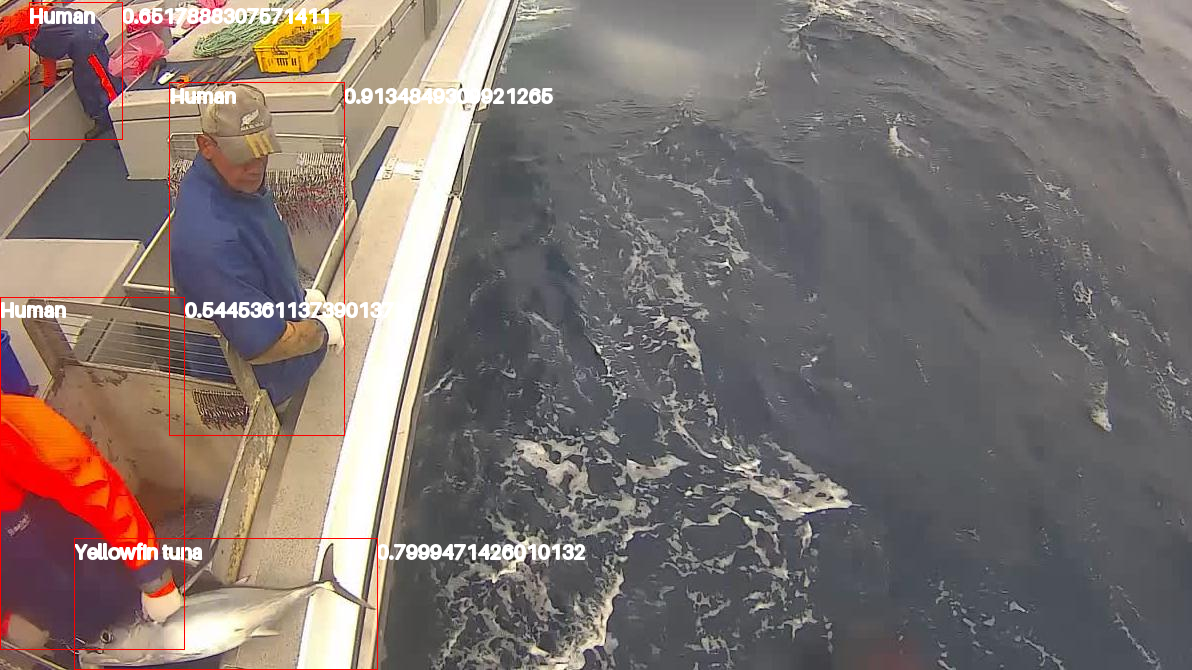

In [84]:
def plot(name,result_yolo):
    img = Image.open(f'{image_path}/{img_test_name}.jpg')
    classes_ids = np.array(result_yolo[0].boxes.cls)
    boxes = np.array(result_yolo[0].boxes.xyxy)
    conf = np.array(result_yolo[0].boxes.conf)
    img_test_draw = ImageDraw.Draw(img)
    for id_class, bbox,c in zip(classes_ids,boxes,conf):
        img_test_draw.text(bbox[:2],classes[id_class],font_size=20,stroke_width=1)
        img_test_draw.text(bbox[[2,1]],str(float(c)),font_size=20,stroke_width=1)
        img_test_draw.rectangle(bbox, outline='red')
    return img
plot(img_test_name,r)

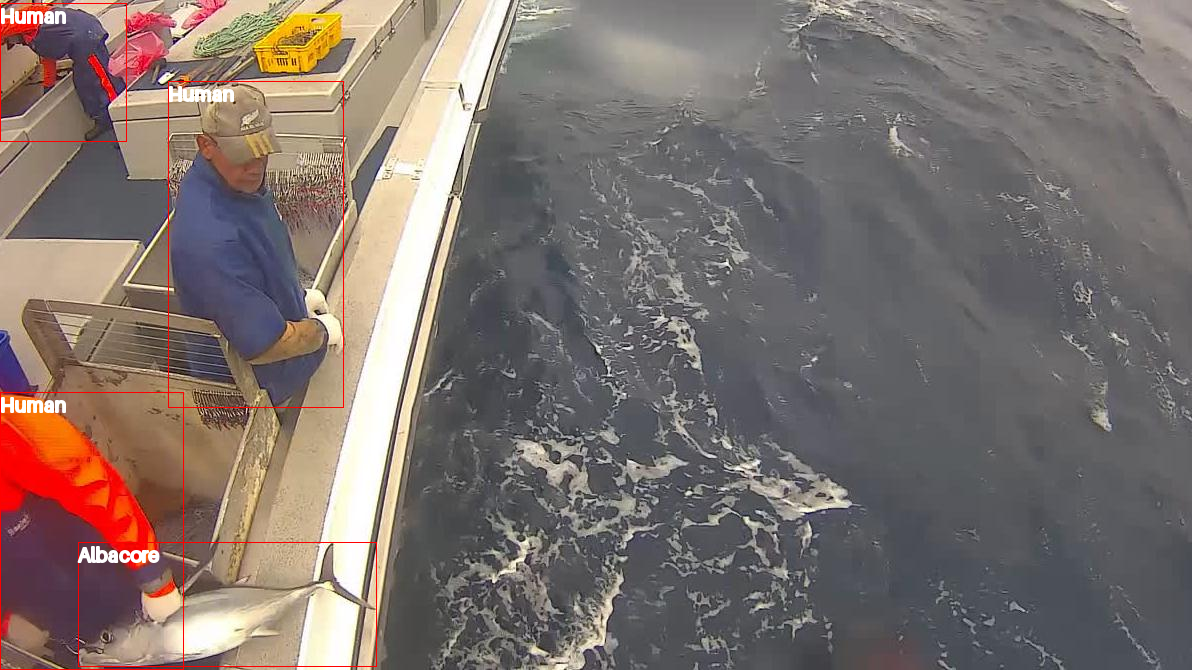

In [85]:
plot_graun_true(img_test_name)

In [87]:
!ls detect4/train

args.yaml					  results.png
confusion_matrix_normalized.png			  train_batch0.jpg
confusion_matrix.png				  train_batch1.jpg
events.out.tfevents.1733081035.484fa1bd7017.23.0  train_batch2.jpg
F1_curve.png					  val_batch0_labels.jpg
labels_correlogram.jpg				  val_batch0_pred.jpg
labels.jpg					  val_batch1_labels.jpg
P_curve.png					  val_batch1_pred.jpg
PR_curve.png					  val_batch2_labels.jpg
R_curve.png					  val_batch2_pred.jpg
results.csv					  weights


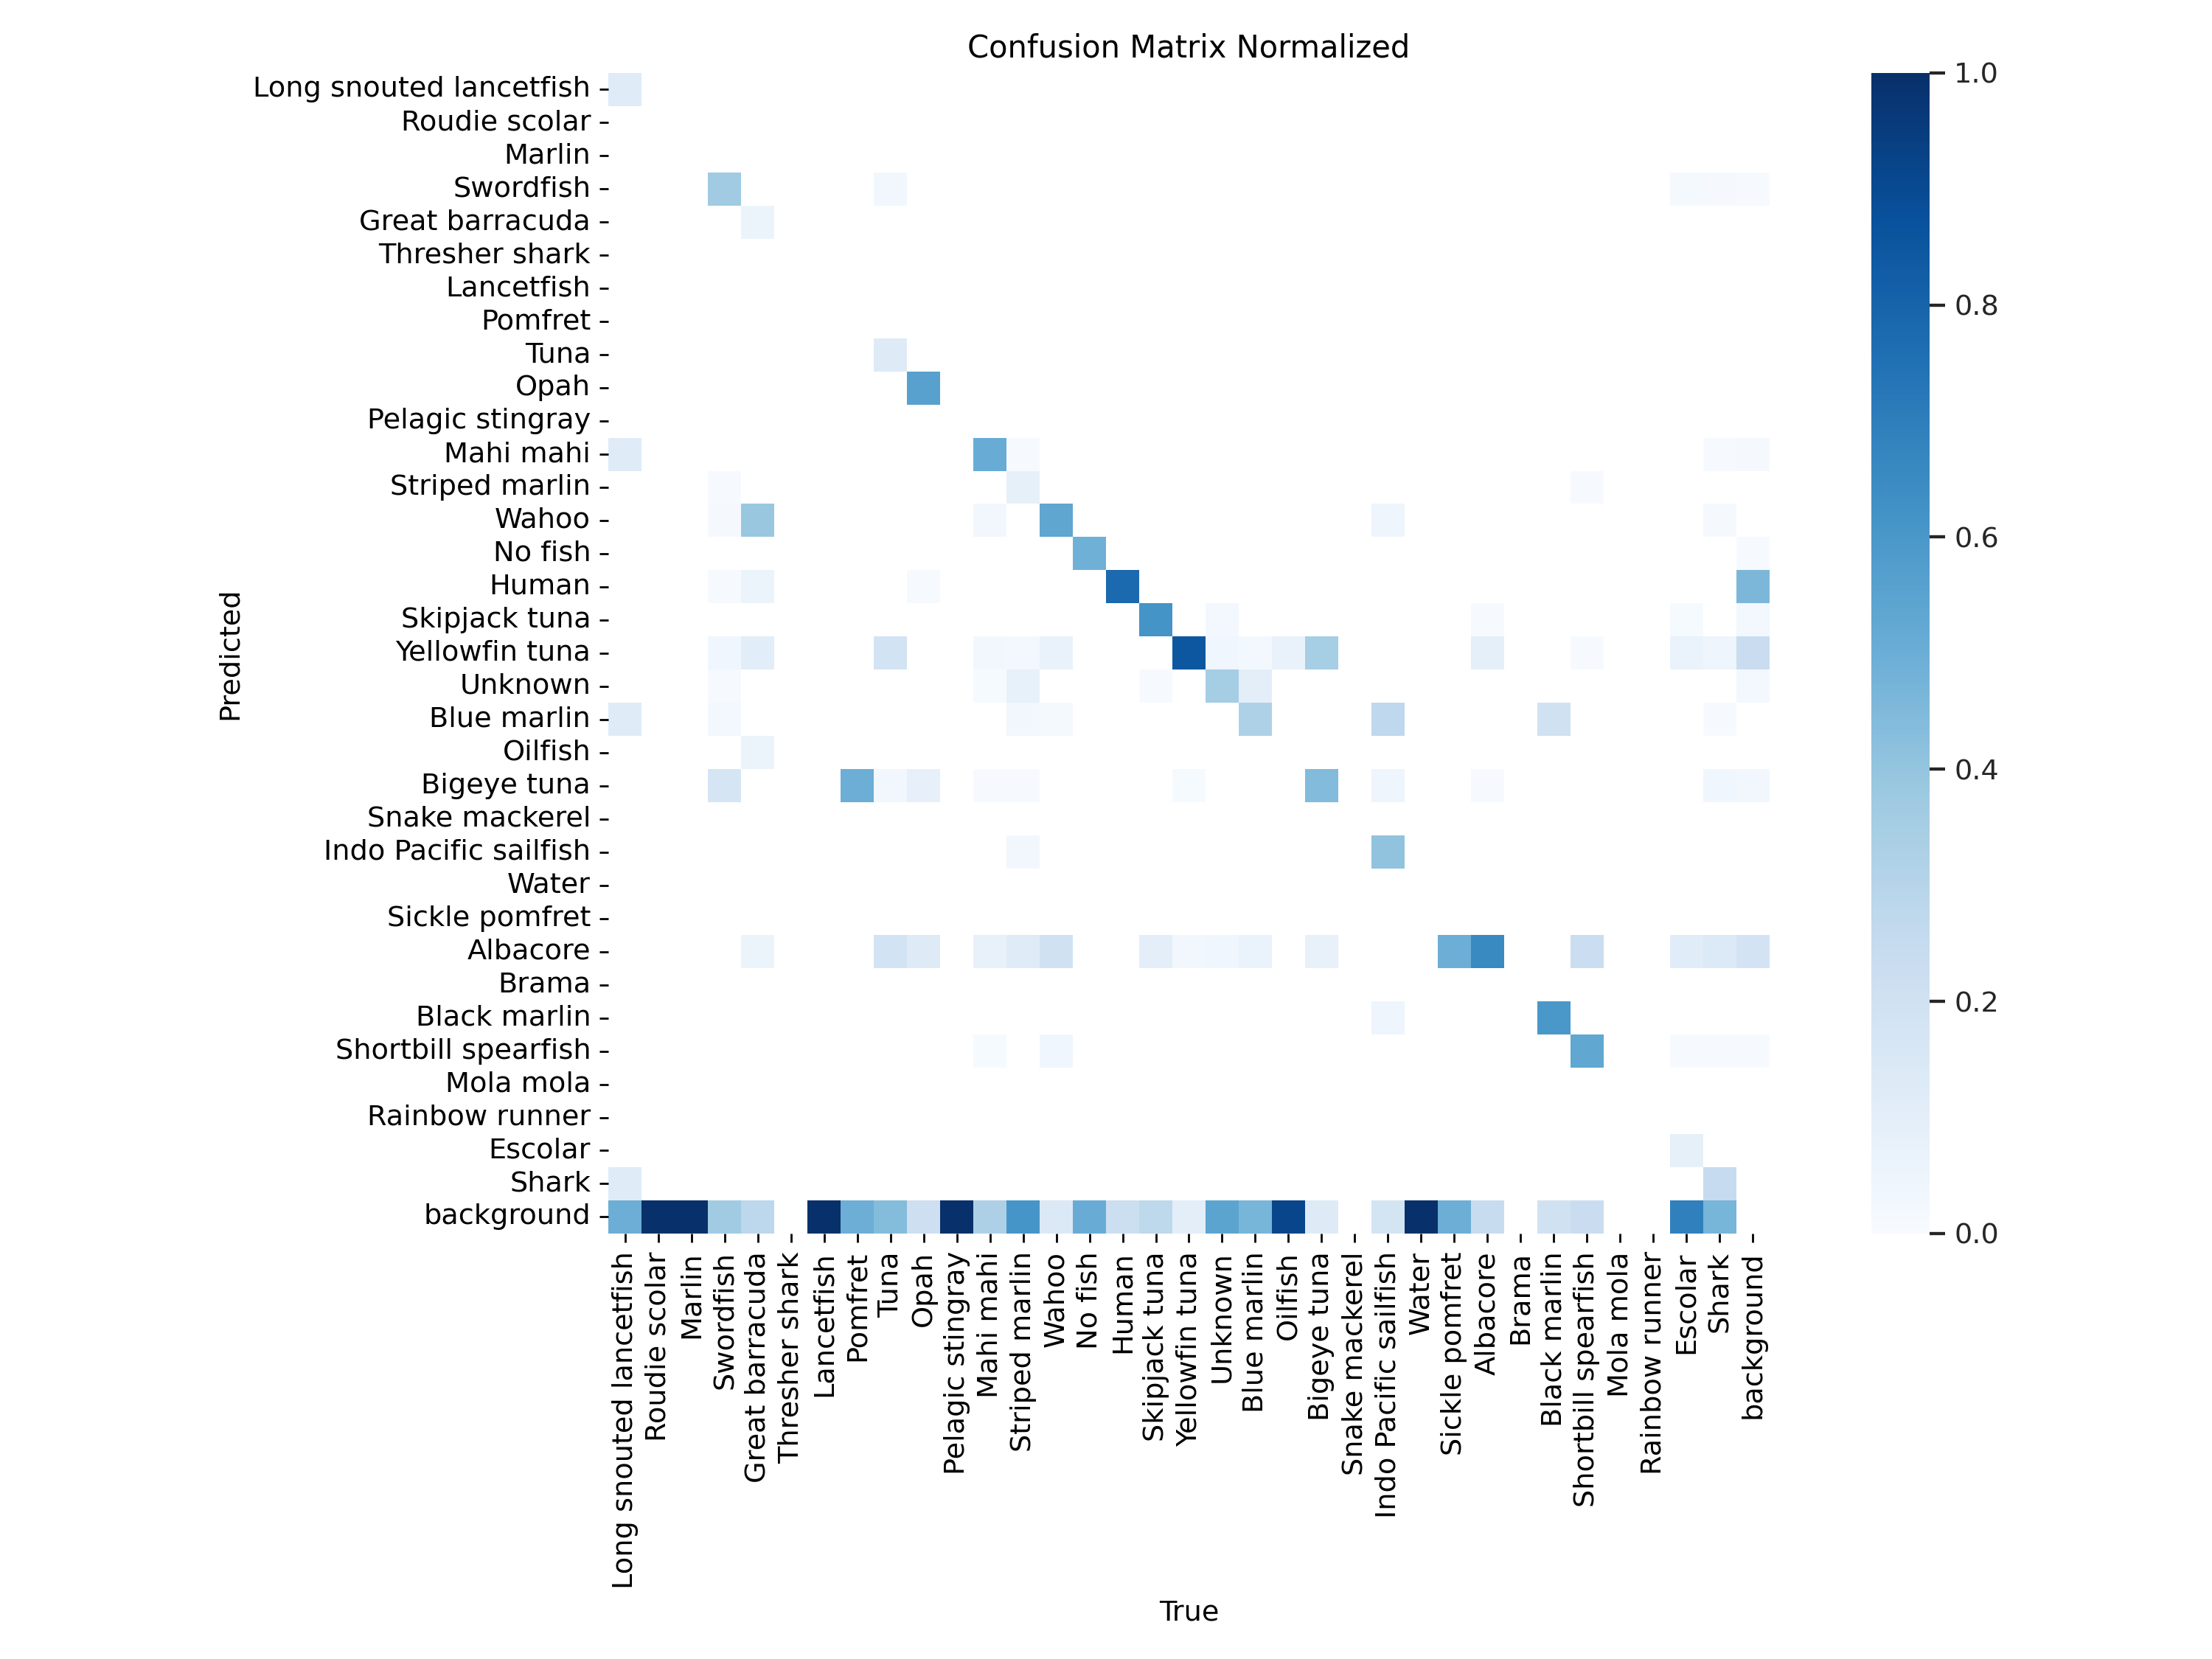

In [88]:
Image.open('detect4/train/confusion_matrix_normalized.png')